CO = OC : double: < 1.285 > single < 1.58       
  table values : double 123,  single 143. single in carbo acids 136
CH ~= 1.25 (1.2 to 1.3)- strange value. normaly < 1.2       table value 1.09 
NH < 1.2
OH < 1.1
CC triple < 1.29 < double  =~1.4=  single < 1.82      
CC table values:   1.20 1.34 1.54              aromatic 1.42

NC 1.75to1.8 - strange. find it sinle

NO 1.30 to 1.31 - check the molecule  -its aromatic
typically < 1.30 - 1.5 or more bonds    >1.31   - single bonds  < 1.78

OO . peroxides ~= 1.45. We have O-O > 2.1   => No Neighbouring oxygens


NN < 1.45. Peaks 1.35 and 1.25;  divisor ~= 1.275;
ie < 1.275 - likely 2 bond;  > 1.275 likely single bond

CF single 1.29 to 1.37; peak 1.335

F-other -- no. all > 1.9


CN (table) >= 1.372 single

1.325 1.334 1.346 1.2

1.335 ~=1.5

1.279 2

1.136 3


In [3]:
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import numpy as np
import os
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
bond_types = ['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN']
pickles = [i for i in os.listdir('data') if ".pkl" in i]
dfs = {i[:-4] : pd.read_pickle('data/'+i) for i in pickles}
print ("\t".join(dfs.keys()))

traintestadj	distances	magnetic_shielding_tensors	traintestpathfixed	df_graph_fixed	test	traintest	dipole_moments	structures_reindexed	lengthes_4	train_contrib	df_graph	train	potential_energy	struc_and_dist	structures	traintestpath	dist_df	mulliken_charges	traintestadjfixed


In [10]:
dfs = None

In [8]:
def get_color(atom):
    if atom == 'F':
        return 'green'
    if atom == 'C':
        return 'black'
    if atom == 'H':
        return 'cyan'
    if atom == 'O':
        return 'red'
    if atom == 'N':
        return 'blue'

def draw(st_dist):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = st_dist.x
    ys = st_dist.y
    zs = st_dist.z
    ax.scatter(xs, ys, zs, color=[get_color(i) for i in st_dist.atom], s=100)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    for ind0 in st_dist.index:
        series = st_dist.loc[ind0]
        atom0 = series.atom
        ax.text3D(series.x, series.y,series.z, str(ind0), color="magenta", fontsize=8)
        for ind1, dist in zip(series.nn_indices[:4], series.nn_distances[:4]):
            atom1 = st_dist.loc[ind1].atom
            if ('H' == atom0) or ('H' == atom1):
                threash = 1.35
            else:
                threash = 1.82
            if dist < threash:
                x_line = np.linspace(series.x, st_dist.loc[ind1].x, 3)
                y_line = np.linspace(series.y, st_dist.loc[ind1].y, 3)
                z_line = np.linspace(series.z, st_dist.loc[ind1].z, 3)
                ax.plot3D(x_line, y_line, z_line, 'gray')
                
            
            

    plt.show()

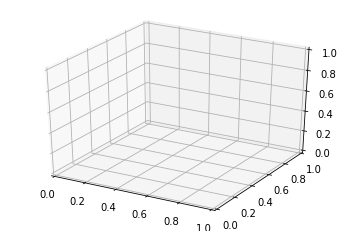

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.text3D()

In [2]:
dfs['dist_df'].head()

nn_indices  \
molecule         atom_index                 
dsgdb9nsd_000001 0           [3, 4, 2, 1]   
                 1           [0, 2, 3, 4]   
                 2           [0, 1, 4, 3]   
                 3           [0, 1, 4, 2]   
                 4           [0, 3, 2, 1]   

                                                                  nn_distances  
molecule         atom_index                                                     
dsgdb9nsd_000001 0           [1.0919463791331034, 1.0919475411120265, 1.091...  
                 1           [1.0919530596119005, 1.7831197560388008, 1.783...  
                 2           [1.0919516185813627, 1.7831197560388008, 1.783...  
                 3           [1.0919463791331034, 1.783147496403011, 1.7831...  
                 4           [1.0919475411120265, 1.783147872229779, 1.7831...

In [4]:
dist = dfs['dist_df']

In [4]:
strucs = dfs['structures_reindexed']

In [6]:
ind = pd.MultiIndex.from_arrays([tr.molecule_name, tr.atom_index_0])

NameError: name 'tr' is not defined

In [7]:
dfs['structures_reindexed'].loc[ind].atom.unique()

NameError: name 'ind' is not defined

In [5]:
dist['atom'] = strucs.atom

In [6]:
struc_and_dist = dfs['struc_and_dist']

In [2]:
lengthes = dfs['lengthes_4']

In [3]:
len(lengthes.keys())

25

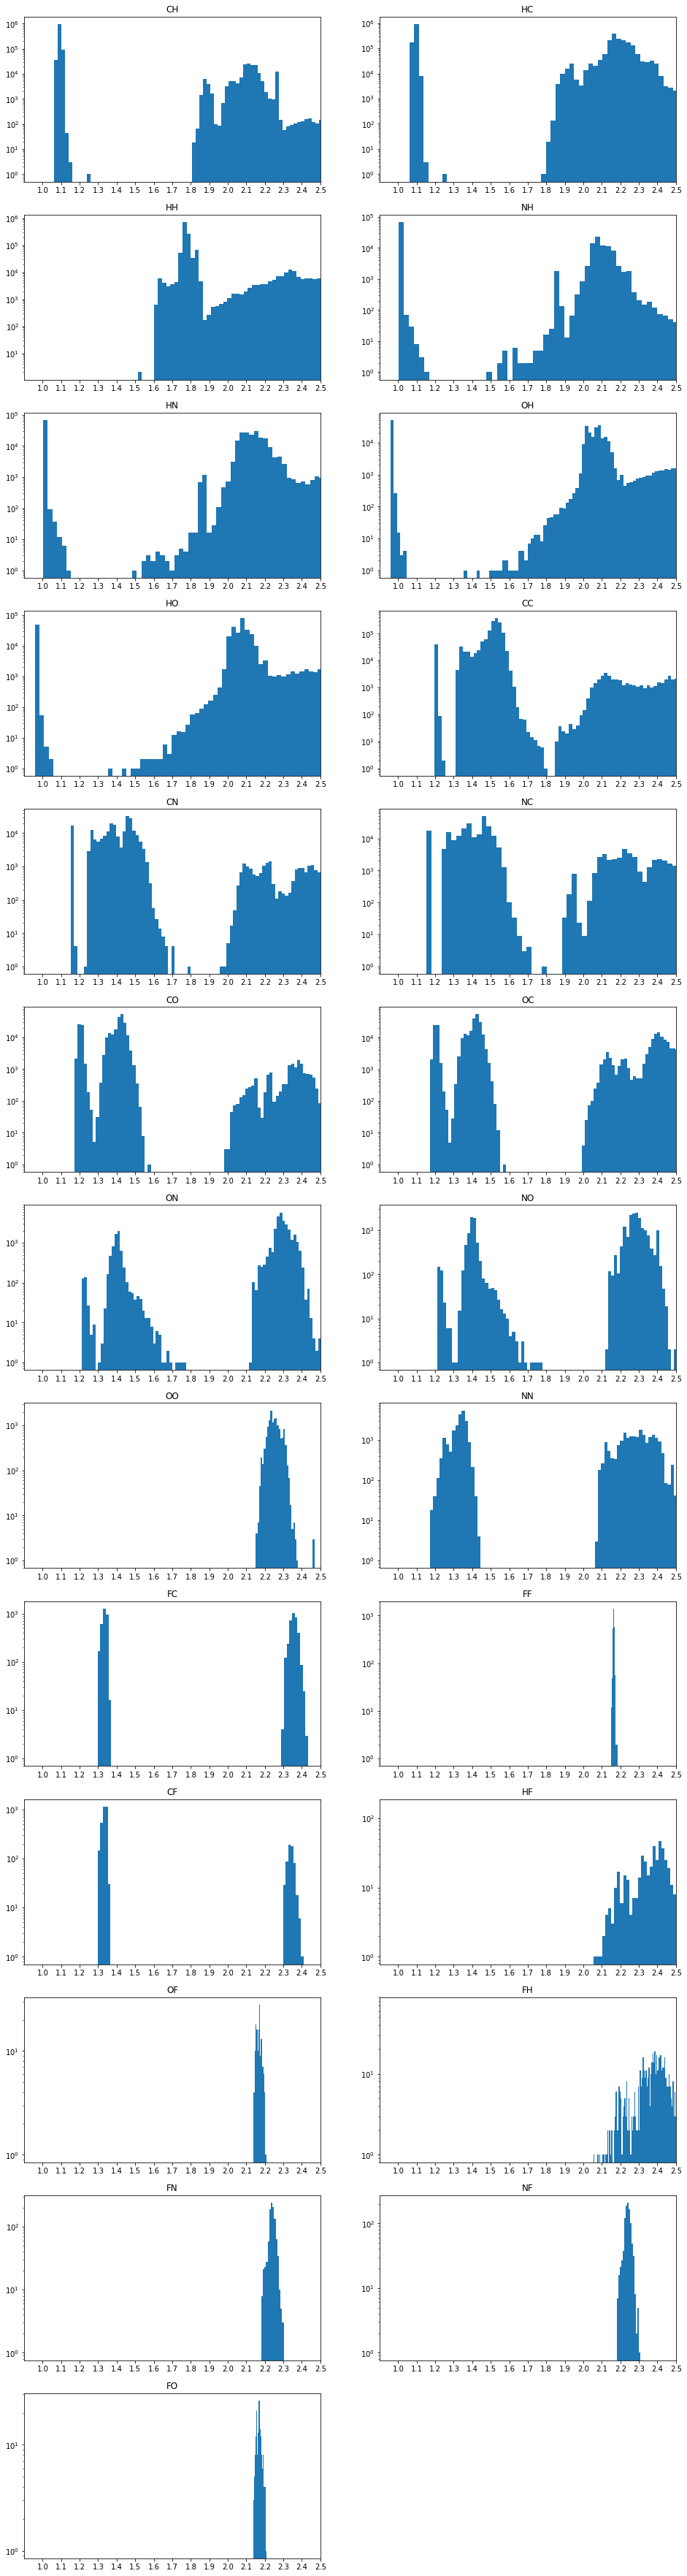

In [31]:
plt.figure(figsize=(16,64))
i = 0
for key, value in lengthes.items():
    i+=1
    plt.subplot(13,2,i)
    plt.title(key)
    plt.hist(value, 150, log=True)
    plt.xlim(.9,2.5)
    plt.xticks(np.linspace(1.,2.5, 16))

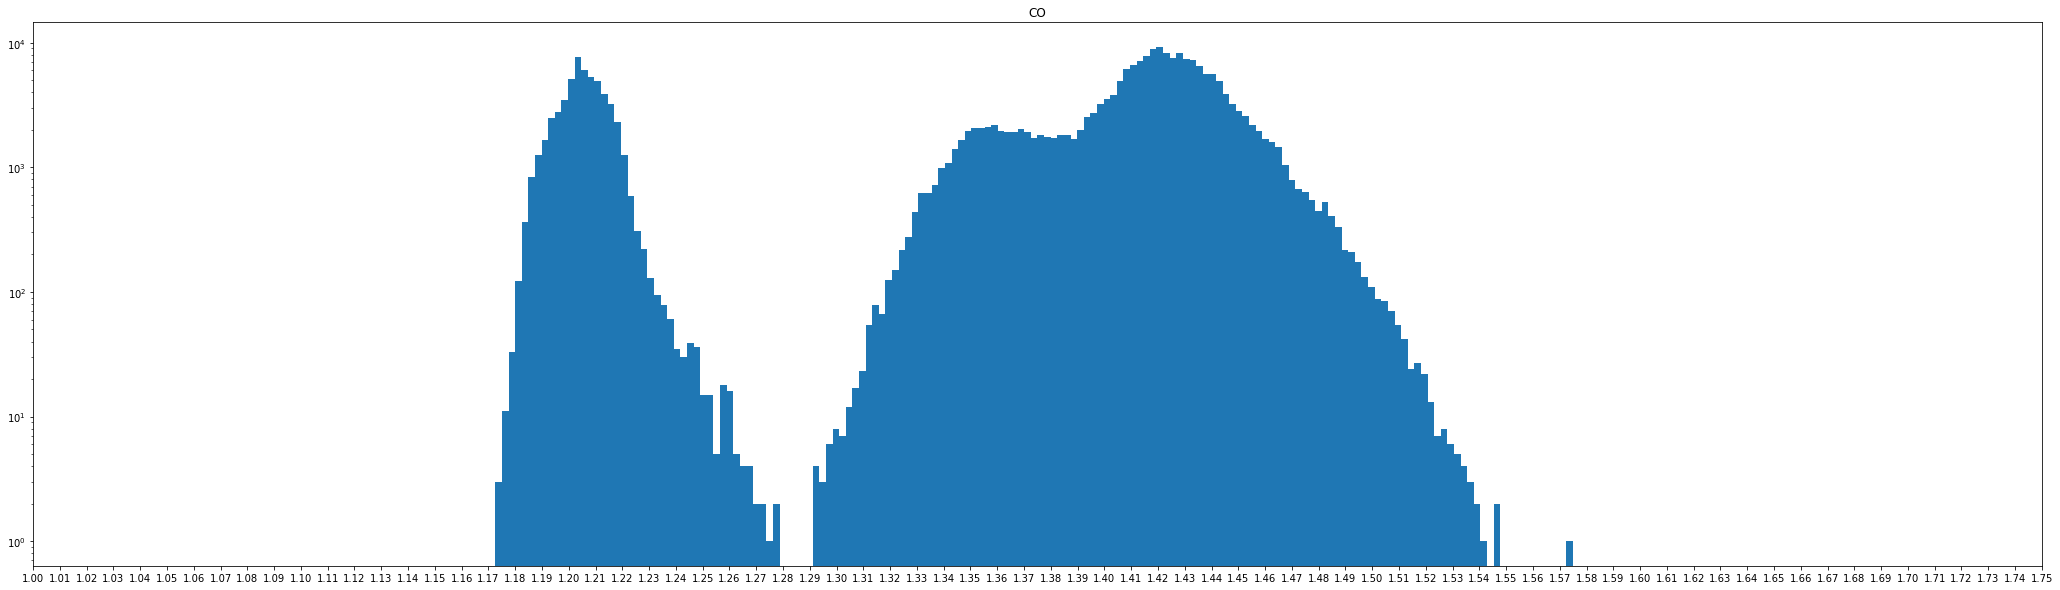

In [25]:
key = 'CO'
plt.figure(figsize=(36,10))
plt.title(key)
plt.hist(lengthes[key], 1000, log=True)
plt.xticks(np.linspace(1.0, 4.0, 301))
plt.xlim(1.,1.75)
plt.show()


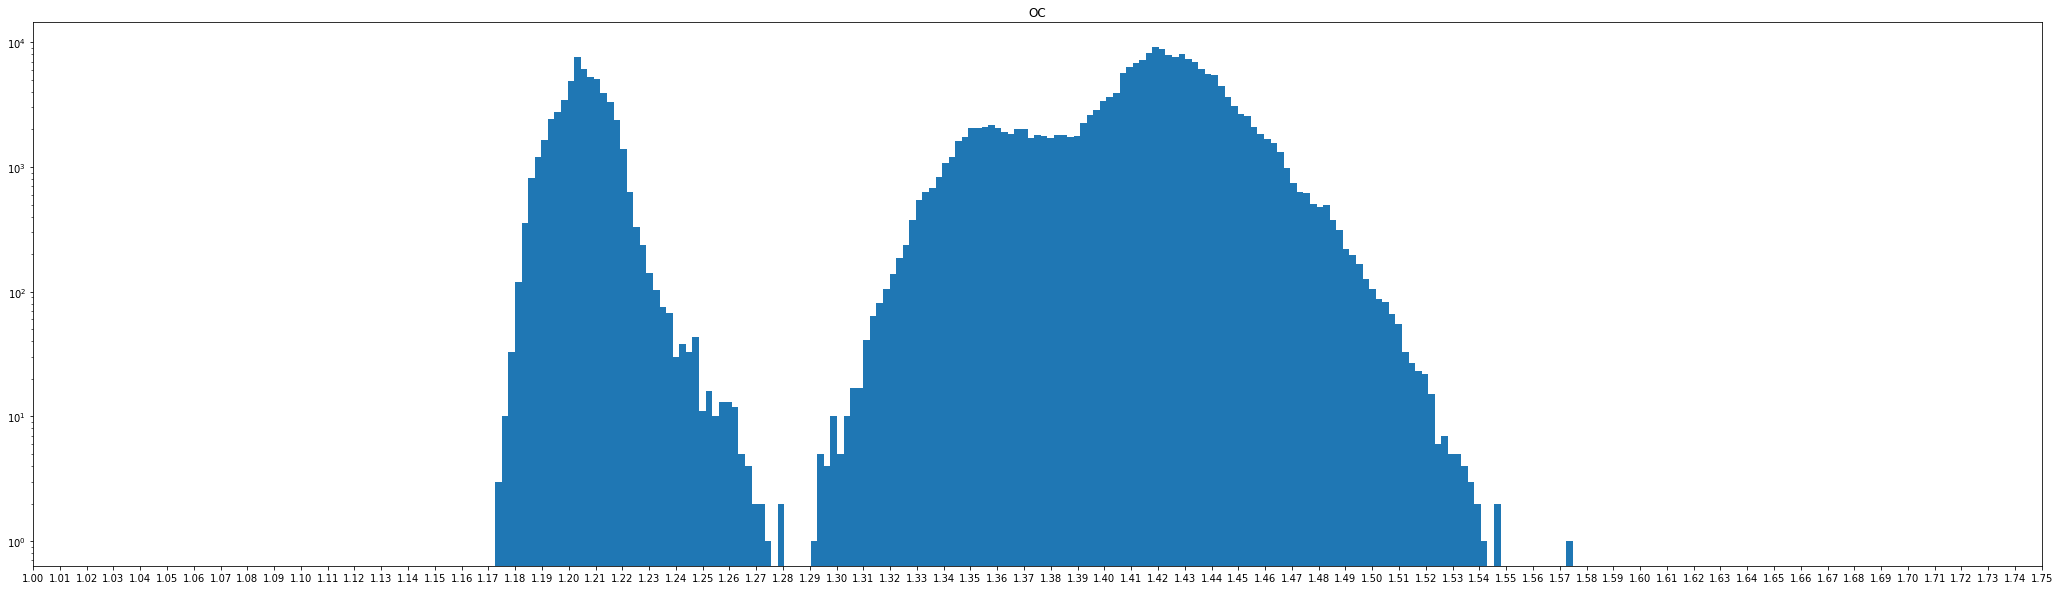

In [40]:
key = 'OC'
plt.figure(figsize=(36,10))
plt.title(key)
plt.hist(lengthes[key], 1000, log=True)
plt.xticks(np.linspace(1.0, 4.0, 301))
plt.xlim(1.,1.75)
plt.show()


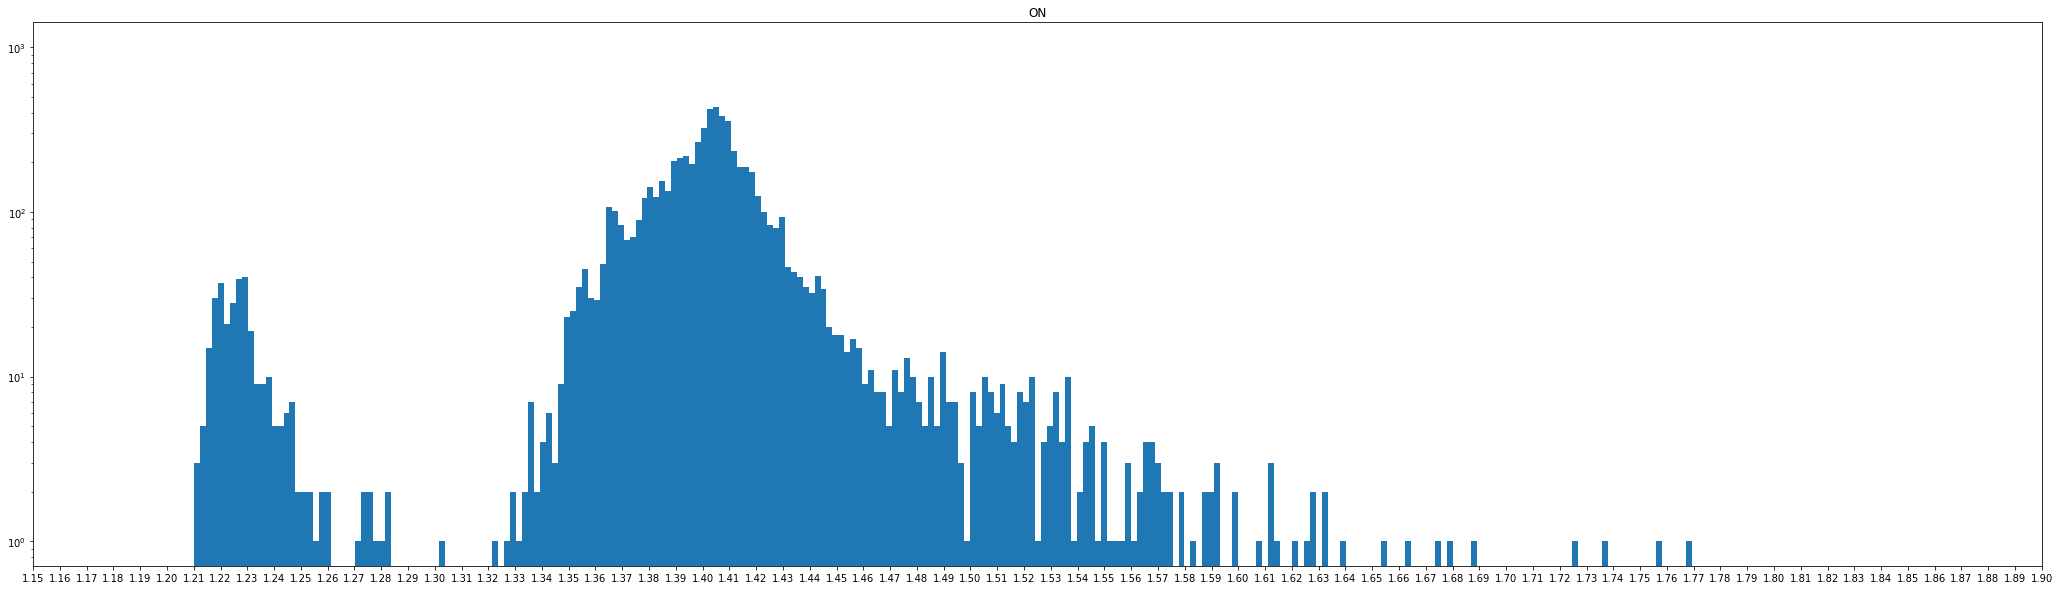

In [36]:
key = 'ON'
plt.figure(figsize=(36,10))
plt.title(key)
plt.hist(lengthes[key], 1000, log=True)
plt.xticks(np.linspace(1.0, 4.0, 301))
plt.xlim(1.15,1.9)
plt.show()


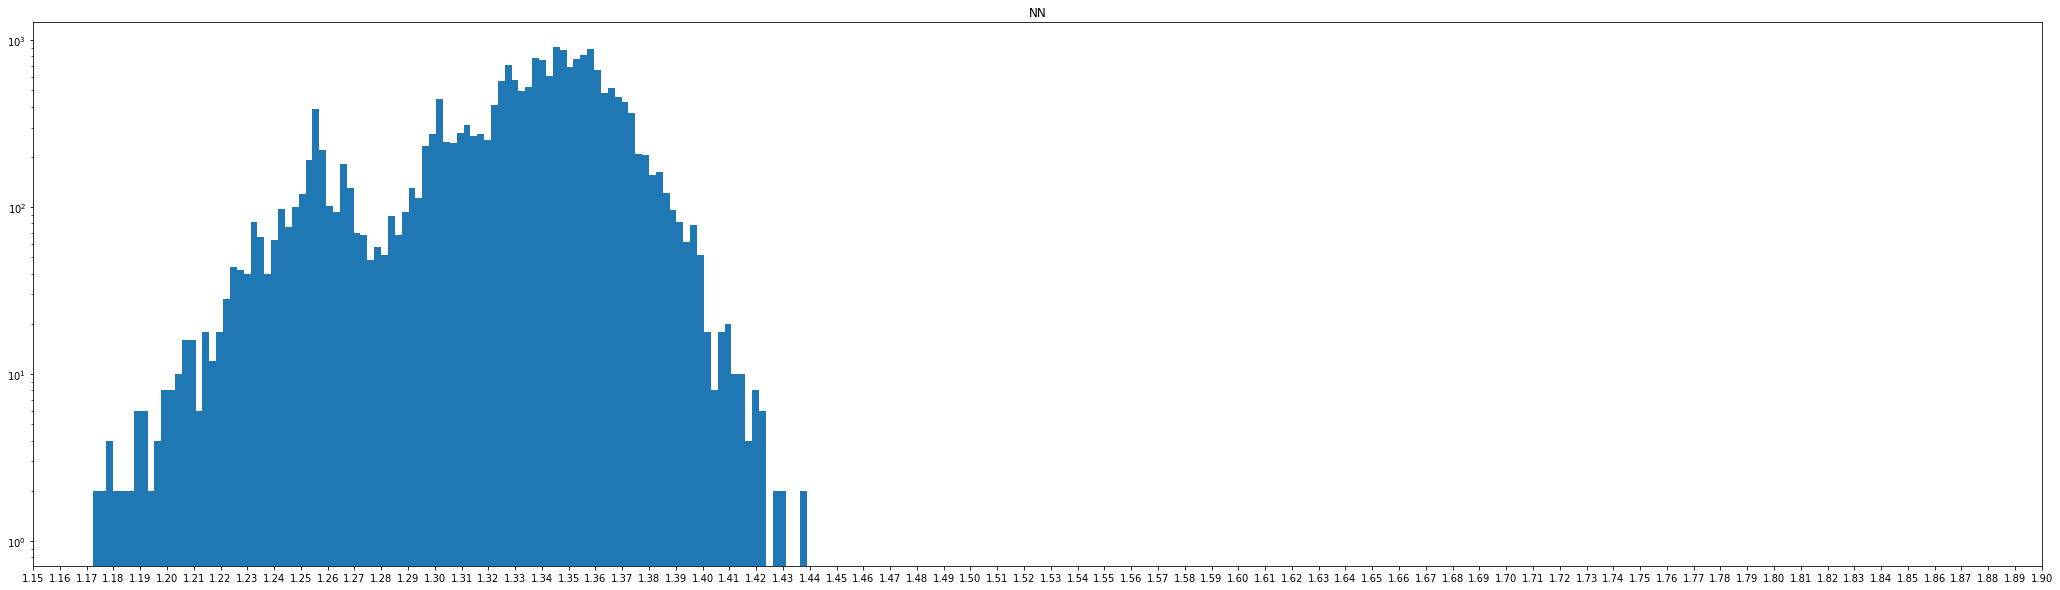

In [41]:
key = 'NN'
plt.figure(figsize=(36,10))
plt.title(key)
plt.hist(lengthes[key], 1000, log=True)
plt.xticks(np.linspace(1.0, 4.0, 301))
plt.xlim(1.15,1.9)
plt.show()

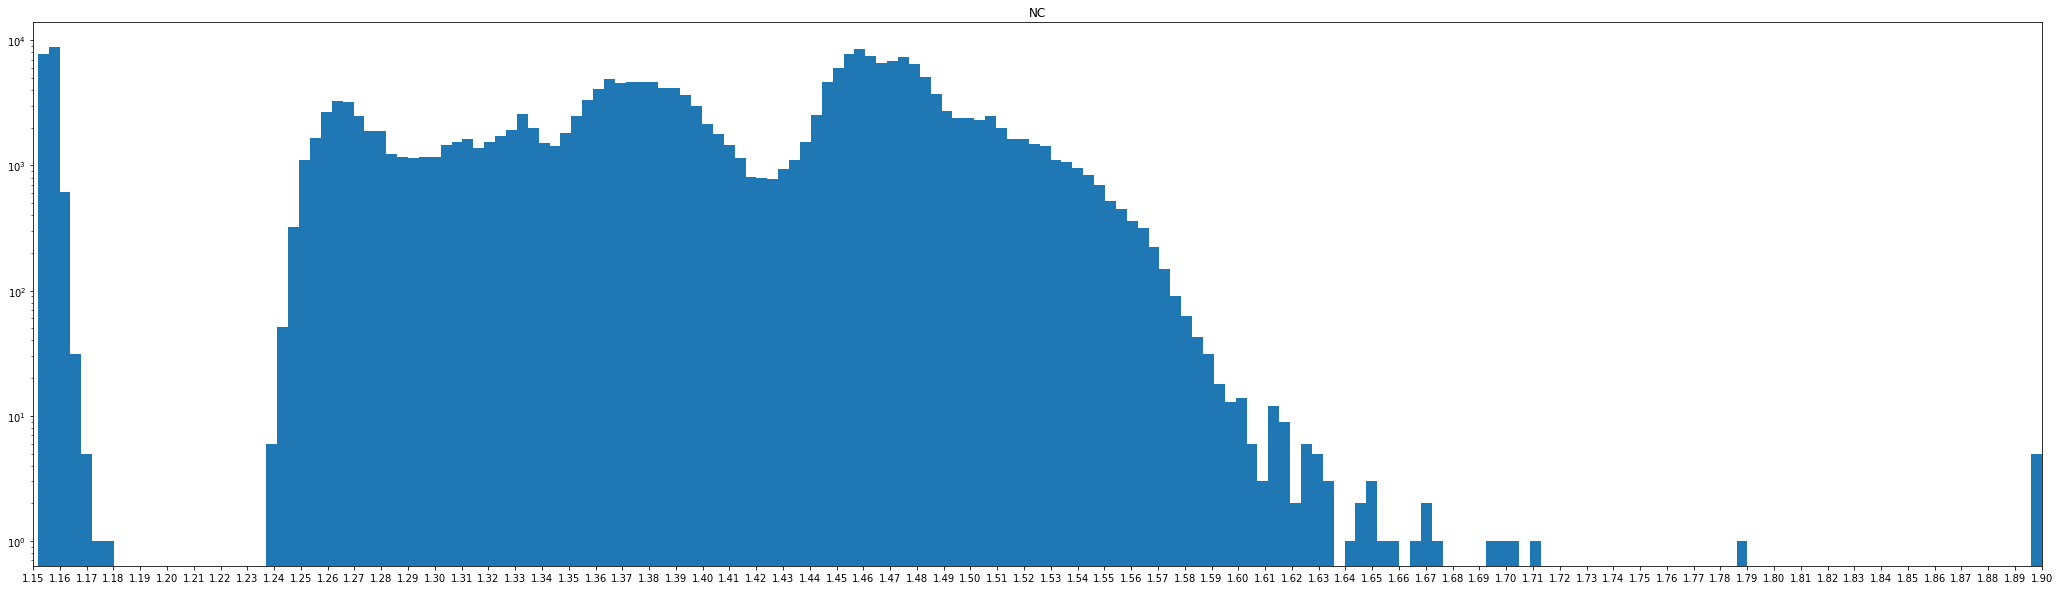

In [63]:
key = 'NC'
plt.figure(figsize=(36,10))
plt.title(key)
plt.hist(lengthes[key], 1000, log=True)
plt.xticks(np.linspace(1.0, 4.0, 301))
plt.xlim(1.15,1.9)
plt.show()

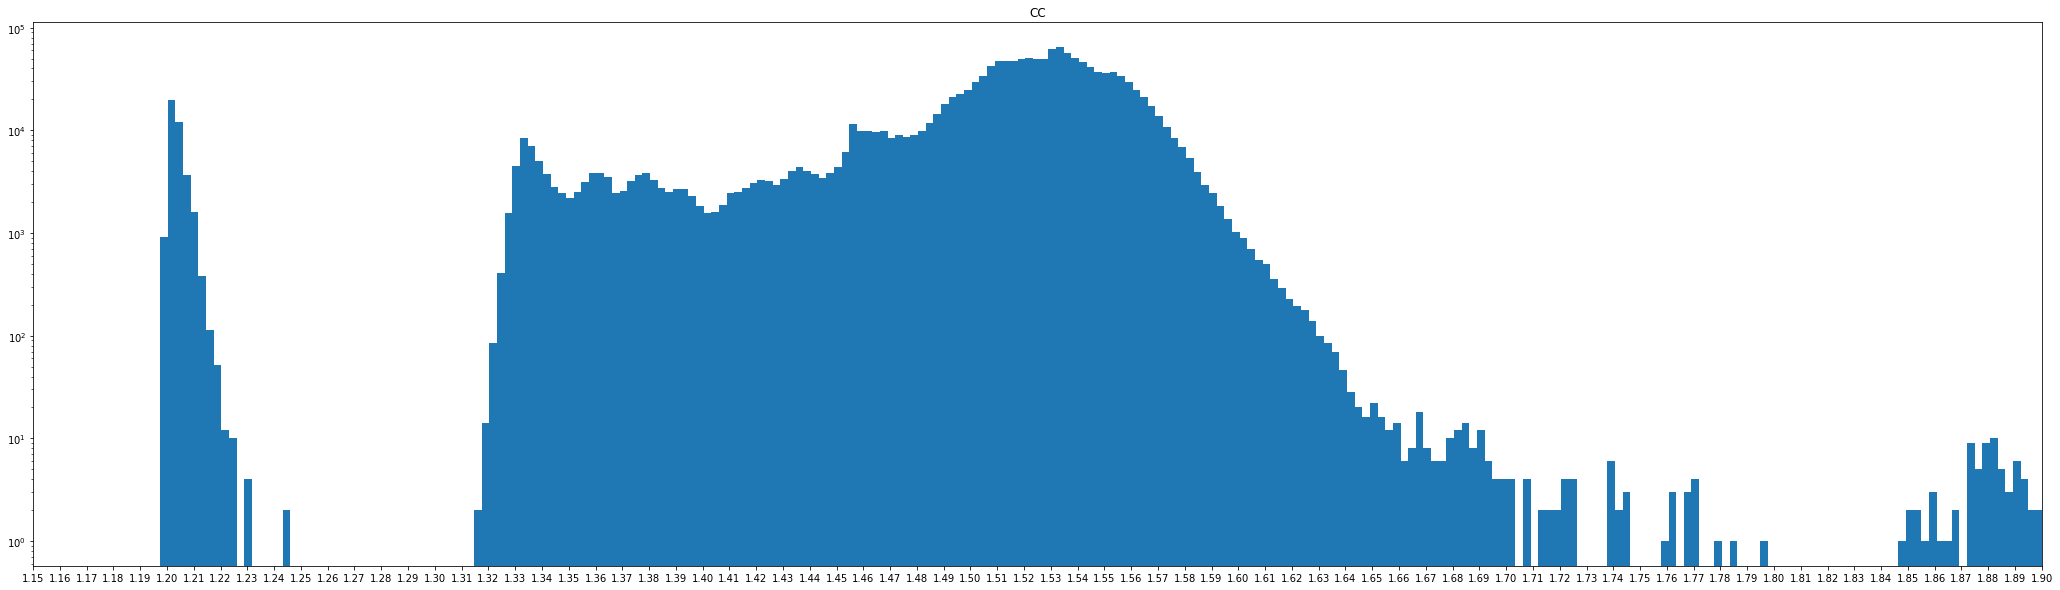

In [4]:
key = 'CC'
plt.figure(figsize=(36,10))
plt.title(key)
plt.hist(lengthes[key], 1000, log=True)
plt.xticks(np.linspace(1.0, 4.0, 301))
plt.xlim(1.15,1.9)
plt.show()

In [45]:
struc_and_dist = dfs['struc_and_dist']

In [48]:
struc_and_dist.loc['dsgdb9nsd_038230']

,atom,x,y,z,nn_indices,nn_distances
atom_index,,,,,,
0,C,0.042448,1.788086,-0.025517,"[10, 9, 1, 3, 2, 11, 8, 13, 4, 7, 6, 5, 15, 12...","[1.087260441559576, 1.0926810228499861, 1.5054..."
1,C,1.503163,1.460607,0.133588,"[11, 0, 8, 2, 3, 9, 10, 7, 13, 12, 6, 17, 4, 5...","[1.0886086390552006, 1.5054051592104154, 1.534..."
2,C,1.007463,0.240655,1.071985,"[13, 12, 3, 1, 0, 7, 11, 9, 8, 17, 4, 10, 6, 5...","[1.0908487716940265, 1.0915948101427866, 1.574..."
3,C,-0.040738,0.219492,-0.102584,"[4, 7, 0, 2, 1, 5, 9, 6, 8, 12, 13, 17, 10, 15...","[1.4189773329140258, 1.5557577245995533, 1.572..."
4,O,-1.276456,-0.231966,-0.634262,"[3, 5, 14, 15, 7, 6, 0, 10, 17, 2, 9, 1, 8, 13...","[1.4189773329140258, 1.4706599078845919, 2.080..."
5,C,-1.125573,0.362815,-1.970791,"[15, 14, 4, 6, 3, 16, 7, 10, 0, 8, 17, 9, 1, 2...","[1.0934618395862676, 1.0969000591468832, 1.470..."
6,C,0.408735,0.440477,-2.266642,"[16, 7, 5, 8, 14, 3, 15, 17, 4, 10, 0, 1, 2, 9...","[1.082295169644128, 1.4289697710358373, 1.5644..."
7,C,0.980431,-0.272586,-1.168161,"[17, 6, 8, 3, 1, 16, 2, 4, 5, 12, 0, 14, 10, 1...","[1.0917461987489292, 1.4289697710358373, 1.434..."
8,N,1.813158,0.891528,-1.257039,"[7, 1, 6, 11, 17, 3, 16, 0, 2, 10, 12, 5, 4, 9...","[1.4340483939088011, 1.5342067492991573, 1.787..."


In [50]:
struc_and_dist.loc['dsgdb9nsd_038230'].loc[8].atom

'N'

<IPython.core.display.Javascript object>


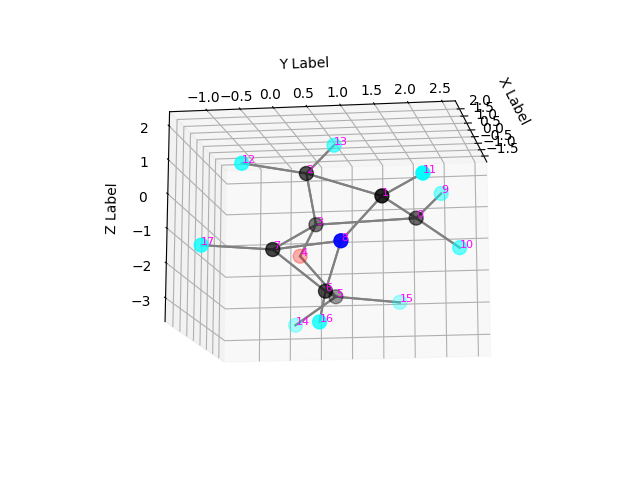

In [9]:
%matplotlib notebook

draw(struc_and_dist.loc['dsgdb9nsd_038230'])

<IPython.core.display.Javascript object>


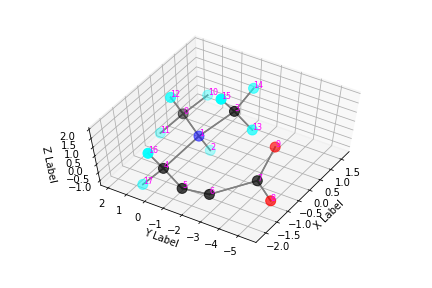

In [69]:
%matplotlib notebook

draw(struc_and_dist.loc['dsgdb9nsd_059827'])

In [70]:
struc_and_dist.loc['dsgdb9nsd_059827']

,atom,x,y,z,nn_indices,nn_distances
atom_index,,,,,,
0,C,0.322758,1.239766,0.049448,"[12, 10, 11, 1, 2, 4, 3, 14, 17, 16, 15, 13, 5...","[1.102664928768635, 1.1032764424214307, 1.1038..."
1,N,-0.179203,-0.213520,-0.087481,"[2, 0, 3, 4, 14, 15, 12, 10, 16, 17, 11, 13, 5...","[1.0626187829016327, 1.543617442426348, 1.5652..."
2,H,0.034649,-0.534952,-1.077485,"[1, 3, 0, 4, 17, 10, 11, 13, 14, 5, 15, 16, 12...","[1.062618782901633, 2.121322319864002, 2.12193..."
3,C,0.532395,-1.233718,0.862614,"[15, 14, 13, 1, 2, 0, 9, 4, 10, 12, 16, 5, 6, ...","[1.103183058701712, 1.104722683726269, 1.24794..."
4,C,-1.776104,-0.309220,0.039062,"[16, 17, 5, 1, 2, 0, 3, 6, 15, 11, 12, 13, 14,...","[1.1109687559891637, 1.11177791246826, 1.45706..."
5,C,-2.128218,-1.713412,-0.126155,"[6, 4, 16, 17, 1, 13, 2, 7, 3, 15, 9, 8, 0, 14...","[1.2252797637698682, 1.4570640558771804, 2.169..."
6,C,-1.958814,-2.924436,-0.203821,"[5, 7, 9, 13, 8, 4, 3, 2, 1, 16, 17, 15, 14, 0...","[1.2252797637698687, 1.6397414255161653, 2.360..."
7,C,-0.971158,-4.230579,-0.118493,"[8, 9, 6, 13, 5, 3, 2, 15, 4, 1, 14, 16, 17, 0...","[1.2585214214499427, 1.3274055286128914, 1.639..."
8,O,-1.374324,-5.406222,-0.316473,"[7, 9, 6, 13, 5, 3, 4, 2, 15, 1, 14, 16, 17, 0...","[1.2585214214499427, 2.364241783439661, 2.5521..."


In [79]:
oo9 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[9]
oo8 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[8]
cc7 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[7]
cc3 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[3]
cc4 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[4]

cc5 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[5]

cc6 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[6]


hh13 = struc_and_dist.loc['dsgdb9nsd_059827'].loc[13]

In [72]:
f = lambda s1, s2: np.sqrt( (s1.x - s2.x)**2 + (s1.y - s2.y)**2 + (s1.z - s2.z)**2)

In [80]:
print (f(cc7, oo8))
print (f(cc7, oo9))
print (f(hh13, oo9))
print (f(cc3, hh13))
print (f(cc5, cc6))
print (f(cc5, cc4))

1.2585214214499416
1.3274055286128918
1.3708844831873206
1.2479418140119725
1.2252797637698685
1.4570640558771801


<IPython.core.display.Javascript object>


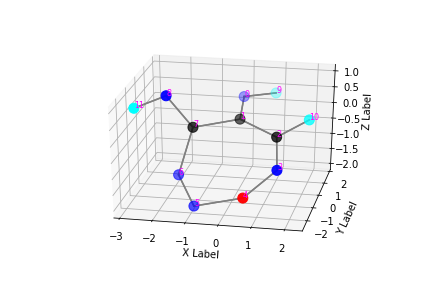

In [88]:
%matplotlib notebook

draw(struc_and_dist.loc['dsgdb9nsd_129099'])

In [89]:

cc2 = struc_and_dist.loc['dsgdb9nsd_129099'].loc[2]
nn3 = struc_and_dist.loc['dsgdb9nsd_129099'].loc[3]

cc7 = struc_and_dist.loc['dsgdb9nsd_129099'].loc[7]
nn6 = struc_and_dist.loc['dsgdb9nsd_129099'].loc[6]



In [90]:
print (f(cc2, nn3))
print (f(cc7, nn6))

1.2866631236712134
1.4602810928948518


In [91]:
dfs['train_contrib'].head()

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,scalar_coupling_constant
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,84.8076
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,-11.2570
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,-11.2548
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,-11.2543
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,84.8074
